In [1]:
import os
os.chdir('/home/reffert/DeepAR_InfluenzaForecast')
from PythonFiles.model import model, preprocessing, split_forecasts_by_week, plot_coverage, print_forecasts_by_week, forecast_by_week, train_test_split
from PythonFiles.Configuration import Configuration
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.rolling_dataset import generate_rolling_dataset,StepStrategy
config = Configuration()
influenza_df = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/Notebooks/DataProcessing/influenza.csv", sep=',')
population_df = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/Notebooks/DataProcessing/PopulationVector.csv", sep=',')
neighbourhood_df = pd.read_csv("/home/reffert/DeepAR_InfluenzaForecast/Notebooks/DataProcessing/AdjacentMatrix.csv", sep=',', index_col=0)

In [2]:
config.train_start_time = datetime(1999,1,1,0,0,0)#datetime(2010,1,1,0,0,0)
config.train_end_time = datetime(2016,9,30,23,0,0)
config.test_end_time = datetime(2018,9,30,23,0,0)
overall_evaluation_df = pd.DataFrame()

data_splits_dict = {}
output_dict = {}

locations = list(influenza_df.location.unique())
#Process the df into a uniformly spaced df
df = influenza_df.loc[influenza_df.location.isin(locations), ['value', 'location', 'date','week']]
df = preprocessing(config, df, check_count=False, output_type="corrected_df")
for location in locations:
    df.loc[df.location == location, "population"] = int(population_df.loc[population_df.Location == location, "2011"].values[0])
    df.loc[df.location == location, locations] = neighbourhood_df.loc[neighbourhood_df.index==location,locations].values[0]

# Creating the different splits

In [3]:
# Data split with no additional features and training start in 2010
data_splits_dict["without_features_2001"] = list(train_test_split(config, df, False))
data_splits_dict["with_features_2001"] = list(train_test_split(config, df, True))

# Change the beginning of the training period
config.train_start_time = datetime(2010,1,1,0,0,0)
data_splits_dict["without_features_2010"] = list(train_test_split(config, df, False))
data_splits_dict["with_features_2010"] = list(train_test_split(config, df, True))

# Model fitting

In [5]:
model_dict = {"DeepAR":config.deeparestimator, "FFNN":config.feedforwardestimator}
for data_split in data_splits_dict.keys():
    print(data_split)
    forecasts_dict, evaluator_df_dict = forecast_by_week(config, data_splits_dict[data_split][0], data_splits_dict[data_split][1], locations, model_dict)
    output_dict[data_split] = [forecasts_dict, evaluator_df_dict]
    #plot_coverage(config, evaluator_df_dict)

without_features_2001


100%|██████████| 50/50 [00:03<00:00, 14.88it/s, epoch=8/8, avg_epoch_loss=0.65]
Running evaluation: 411it [00:02, 147.16it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 132.62it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 131.84it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 130.55it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  

with_features_2001


100%|██████████| 50/50 [00:32<00:00,  1.53it/s, epoch=8/8, avg_epoch_loss=0.756]
Running evaluation: 411it [00:02, 144.12it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 137.91it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 141.36it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 135.67it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
 

without_features_2010


100%|██████████| 50/50 [00:03<00:00, 14.01it/s, epoch=8/8, avg_epoch_loss=0.885]
Running evaluation: 411it [00:03, 134.43it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 137.88it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:02, 137.02it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 133.43it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
 

with_features_2010


100%|██████████| 50/50 [00:33<00:00,  1.47it/s, epoch=8/8, avg_epoch_loss=0.98] 
Running evaluation: 411it [00:03, 132.51it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 131.89it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 131.72it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
  return arr.astype(dtype, copy=True)
Running evaluation: 411it [00:03, 128.41it/s]
/home/reffert/.conda/envs/TEST_ENV/lib/python3.10/site-packages/pandas/core/dtypes/cast.py:1181: UserWarning: Warning: converting a masked element to nan.
 

# Comparative Evaluation

In [6]:
final_evaluation_df = pd.DataFrame()
for data_split in output_dict.keys():
    forecasts_dict = output_dict[data_split][0]
    evaluator_df_dict = output_dict[data_split][1]
    #print(data_split)
    #plot_coverage(config, evaluator_df_dict)
    for key in evaluator_df_dict.keys():
        evaluation_df = evaluator_df_dict[key].copy()
        evaluation_df = evaluation_df.loc[evaluation_df.item_id.isin([item_id for item_id in evaluation_df.item_id if "aggregate" in item_id]),]        
        evaluation_df['ID'] = str(data_split) + str(key)
        final_evaluation_df = pd.concat([final_evaluation_df, evaluation_df])
for i in range(1,5):
    print(f"Week-{i}-Ahead")
    print(final_evaluation_df.loc[final_evaluation_df.item_id == "aggregated {"f"{i}"+"}" ,["ID", "mean_WIS", "MAE_Coverage"]].reset_index(drop=True))

Week-1-Ahead
                            ID    mean_WIS  MAE_Coverage
0  without_features_2001DeepAR  301.034811      0.223302
1    without_features_2001FFNN  410.714095      0.126897
2     with_features_2001DeepAR  385.392683      0.274645
3       with_features_2001FFNN  745.983768      0.122734
4  without_features_2010DeepAR  436.614355      0.280632
5    without_features_2010FFNN  537.842301      0.101303
6     with_features_2010DeepAR  506.073479      0.288679
7       with_features_2010FFNN  589.050052      0.110154
Week-2-Ahead
                            ID    mean_WIS  MAE_Coverage
0  without_features_2001DeepAR  439.737348      0.235283
1    without_features_2001FFNN  582.562113      0.122598
2     with_features_2001DeepAR  529.345690      0.285367
3       with_features_2001FFNN  715.448001      0.086825
4  without_features_2010DeepAR  455.994560      0.283866
5    without_features_2010FFNN  624.465485      0.077093
6     with_features_2010DeepAR  535.542735      0.300504
7    

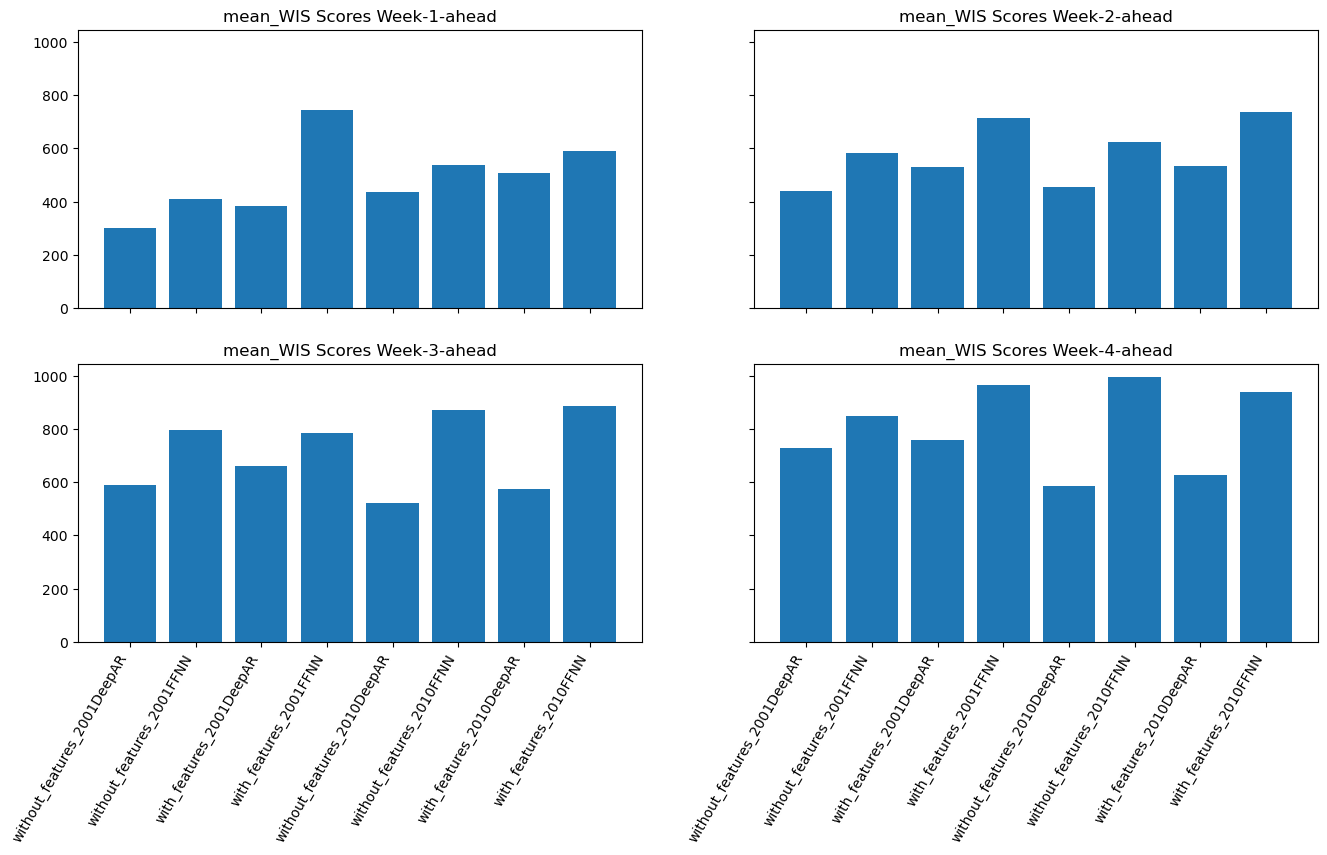

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 9), sharey=True)
for i in range(1,5):
    if i == 1:
        plotnumber = (0, 0)
    if i == 2:
        plotnumber = (0, 1)
    if i == 3:
        plotnumber = (1, 0)
    if i == 4:
        plotnumber = (1, 1)
    axs[plotnumber].bar(final_evaluation_df.loc[final_evaluation_df.item_id == "aggregated {"f"{i}"+"}","ID"], final_evaluation_df.loc[final_evaluation_df.item_id == "aggregated {"f"{i}"+"}","mean_WIS"])
    axs[plotnumber].set_title(f"mean_WIS Scores Week-{i}-ahead")
fig.autofmt_xdate(rotation=60, ha='right')
plt.show()